In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
symbols = os.listdir("./Data/")[:10]
concat = []
for symbol in symbols:
    
    df = pd.read_csv(f"./origin_data/{symbol}.csv")
    df = df.query("Date >= '2016-01-01'")
    df = df.reset_index()
    del df["index"]
    tmp = df["Adj Close"]
    tmp.name = symbol 
    concat.append(tmp)

concat = pd.concat(concat, axis=1)
concat

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS
0,24.185045,131.357468,60.999992,126.005127,56.383411,76.709999,21.543217,66.813522,97.155785,157.862823
1,23.578981,131.216431,60.061409,126.516304,55.794609,77.050003,21.445328,67.385010,95.193420,155.144760
2,23.117550,130.013535,58.393524,124.507393,54.915562,76.290001,21.216927,64.723015,94.683960,151.357285
3,22.141886,126.910828,57.867786,119.287804,53.024773,74.300003,20.727495,62.429462,93.872597,146.705353
4,22.258966,125.027702,57.677437,116.579407,52.485737,73.230003,20.213589,61.760178,93.636742,146.099335
...,...,...,...,...,...,...,...,...,...,...
1654,162.509995,247.470001,154.020004,159.309998,198.250000,184.020004,45.369999,163.779999,106.099998,333.390015
1655,161.509995,245.639999,153.330002,169.070007,194.860001,182.979996,45.279999,160.509995,106.220001,332.079987
1656,160.009995,243.910004,151.600006,163.279999,183.509995,183.789993,44.919998,159.139999,104.709999,327.880005
1657,166.130005,247.139999,155.429993,166.639999,182.869995,189.649994,45.709999,155.360001,109.019997,333.170013


In [3]:
concat.describe().round(2)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS
count,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00
mean,73.48,183.19,106.07,233.25,133.28,153.95,39.31,96.98,122.20,230.44
std,48.00,38.83,36.29,87.20,48.25,62.17,10.37,21.61,28.92,72.46
min,20.98,114.36,46.33,95.01,48.63,54.05,18.36,48.42,83.82,125.38
25%,36.85,150.36,79.51,158.91,100.44,92.77,28.86,83.17,99.89,187.03
50%,49.99,175.51,98.36,218.50,125.61,152.50,40.56,95.71,110.44,209.12
75%,120.88,220.43,122.84,326.58,171.33,197.81,46.39,103.83,139.50,246.19
max,181.51,256.74,197.08,430.30,238.17,309.96,62.59,181.13,201.91,416.60


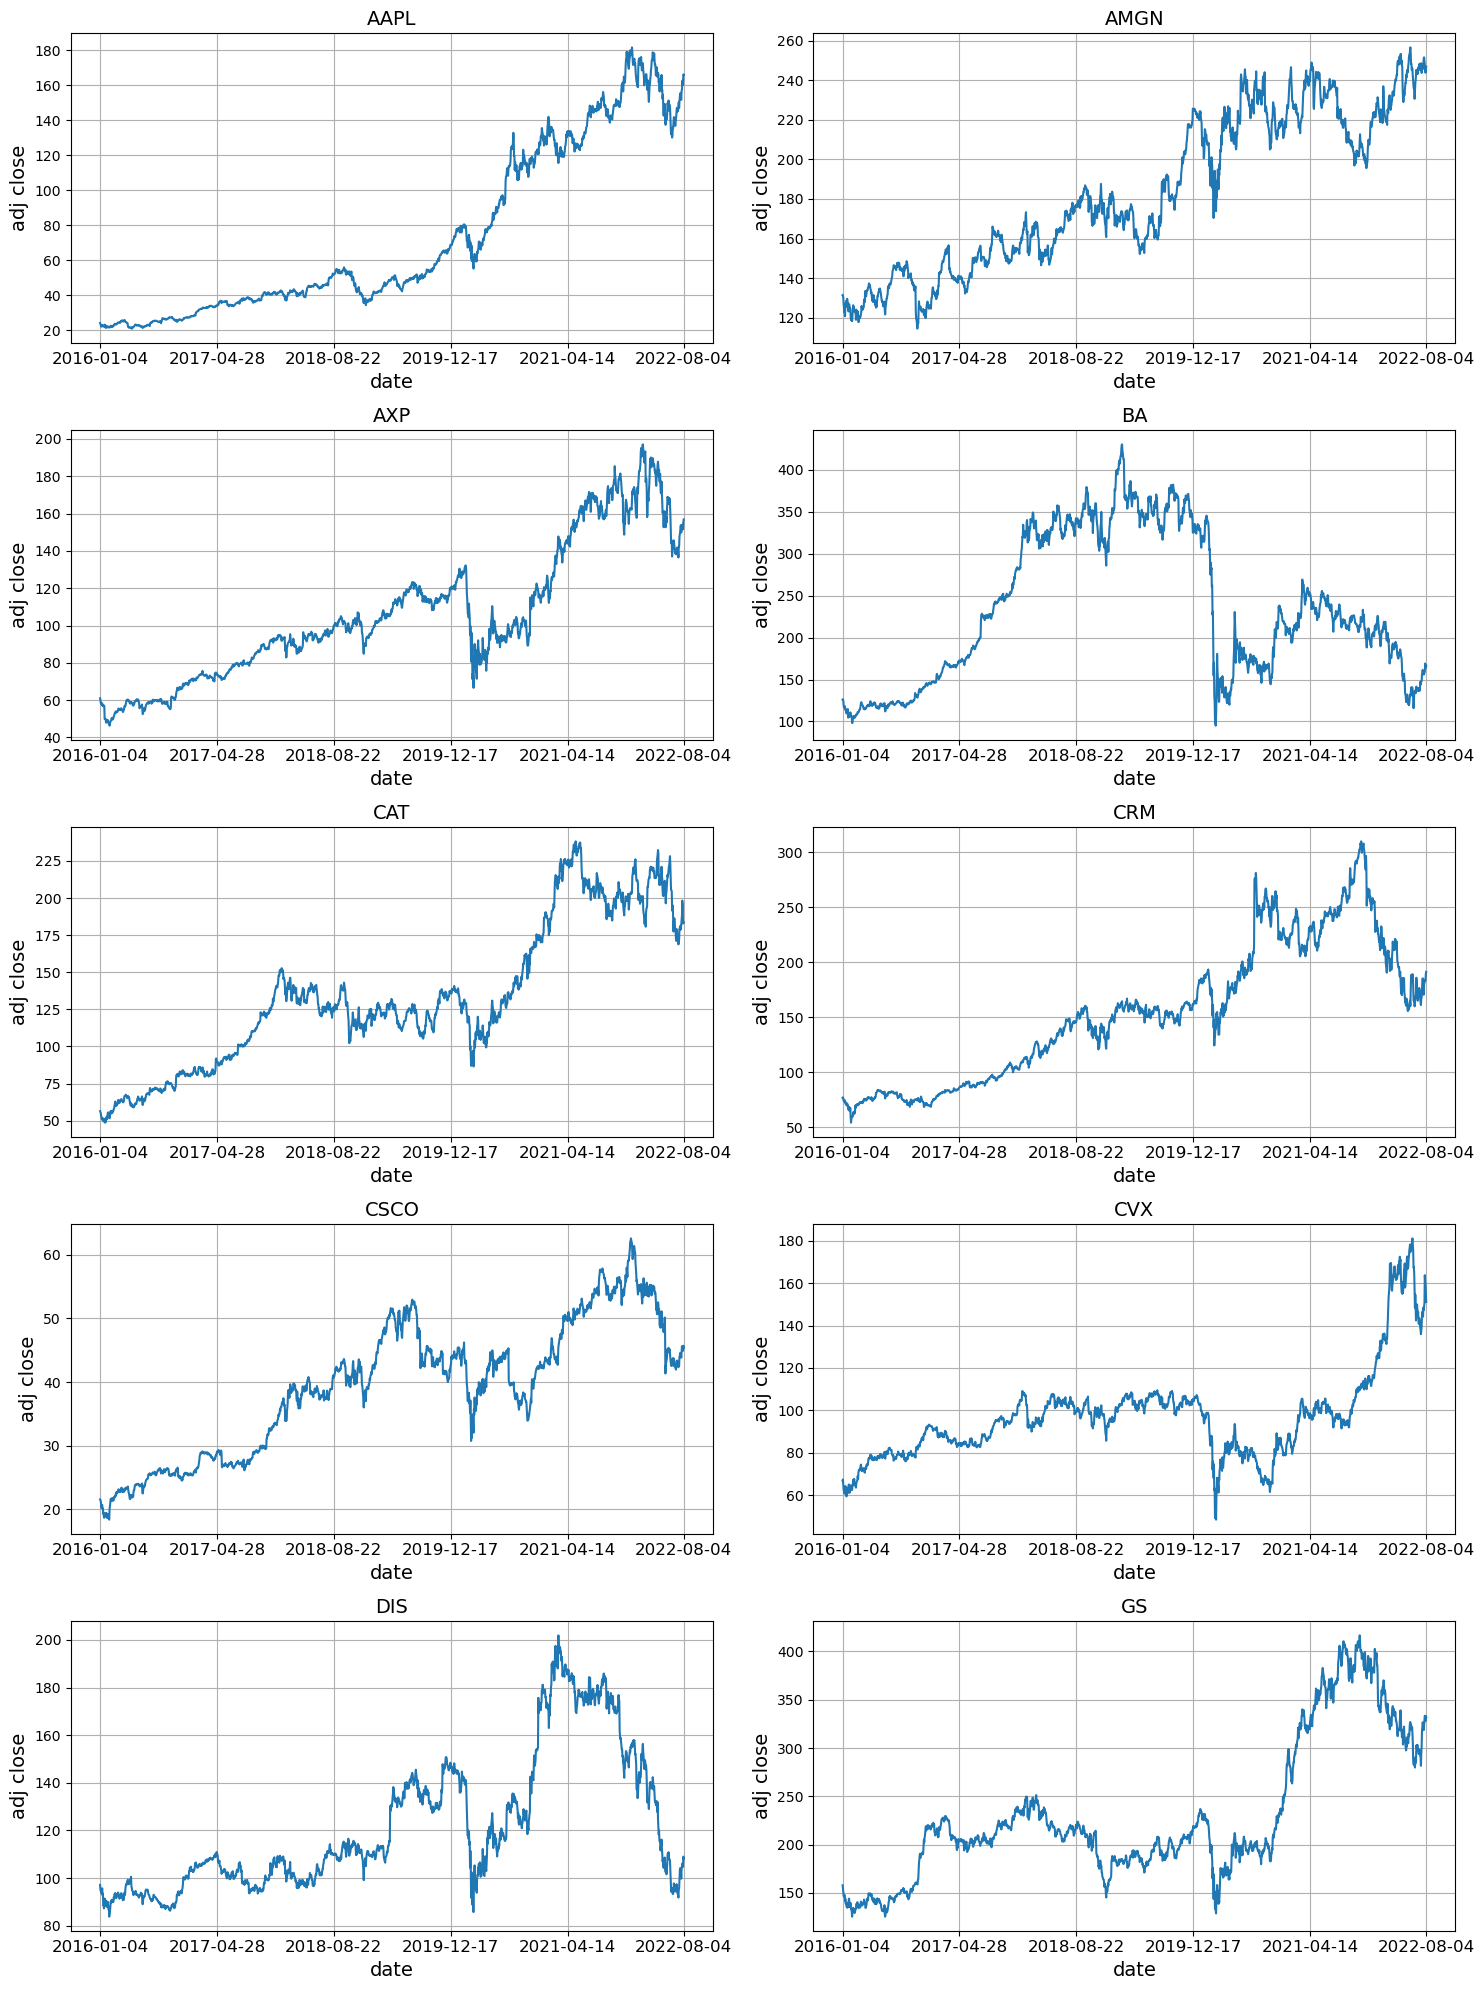

In [6]:

dates = []
indexes = []
for index in range(5):
    tmp = df.iloc[0 + index * 332]
    date = tmp["Date"]
    dates.append(date)
    indexes.append(0 + index * 332)

dates.append("2022-08-04")
index = df["Date"].tolist().index("2022-08-04")
indexes.append(index)

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.reshape(-1)
for i, symbol in enumerate(symbols):
    axes[i].plot(concat[symbol])
    axes[i].set_xticks(indexes, dates, fontsize=12)
    axes[i].set_xlabel("date", fontsize=14)
    axes[i].set_ylabel("adj close", fontsize=14)
    axes[i].grid()
    axes[i].set_title(symbol, fontsize=14)


plt.tight_layout()
plt.savefig("./pictures/1-adj-close.eps")
plt.show()

In [59]:
df = pd.read_csv(f"./origin_data/BA.csv")
df.query("Close >= 300 & Close <= 310")

,Date,Open,High,Low,Close,Volume,Adj Close
2018,2018-01-09,295.990086,304.871988,295.894781,303.461548,5641300,303.461548
2019,2018-01-10,302.565727,307.006677,300.669280,305.205536,4479300,305.205536
2068,2018-03-22,316.145421,318.606709,305.515005,306.089600,7282200,306.089600
2069,2018-03-23,306.606728,317.131839,304.854155,307.420776,7237500,307.420776
2071,2018-03-27,317.486225,320.713660,305.505423,307.535736,5355500,307.535736
2072,2018-03-28,308.234841,309.566025,298.006642,306.482239,5634700,306.482239
2074,2018-04-02,311.443119,315.982594,303.752812,308.799866,5024900,308.799866
2079,2018-04-09,318.194887,320.713635,308.426364,308.838196,4931700,308.838196
2237,2018-11-20,293.549623,313.061282,288.214987,308.708099,6875900,308.708099
2238,2018-11-21,315.869487,317.637982,306.638367,308.338837,4401000,308.338837
